# Text summarization with Spacy

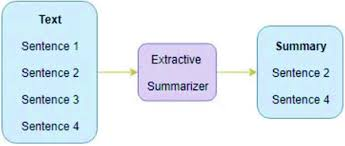

In [ ]:
!pip install spacy

In [3]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.4 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180943 sha256=19819e701c063ca5b0e1bc630b1194d43f1e00bd5c9a36fc3264b4ef0b1dc586
  Stored in directory: /tmp/pip-ephem-wheel-cache-gygy4l5d/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [8]:
# Text Preprocessing Pkg
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation

In [9]:
# Build a List of Stopwords
stopwords = list(STOP_WORDS)

In [14]:
text ="""Machine learning (ML) is the scientific study of algorithms and statistical models that computer systems use to progressively improve their performance on a specific task. Machine learning algorithms build a mathematical model of sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task. Machine learning algorithms are used in the applications of email filtering, detection of network intruders, and computer vision, where it is infeasible to develop an algorithm of specific instructions for performing the task. Machine learning is closely related to computational statistics, which focuses on making predictions using computers. The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a field of study within machine learning, and focuses on exploratory data analysis through unsupervised learning.In its application across business problems, machine learning is also referred to as predictive analytics."""

In [11]:
#load spacy
nlp = spacy.load('en')

In [16]:
# Build an NLP Object
docx = nlp(text)

In [17]:
# Tokenization of Text
mytokens = [token.text for token in docx]

## WORD FREQUENCY TABLE

In [18]:
word_frequencies = {}
for word in docx:
    if word.text not in stopwords:
            if word.text not in word_frequencies.keys():
                word_frequencies[word.text] = 1
            else:
                word_frequencies[word.text] += 1

In [19]:
word_frequencies

{'"': 2,
 '(': 1,
 ')': 1,
 ',': 9,
 '.': 7,
 'Data': 1,
 'In': 1,
 'ML': 1,
 'Machine': 4,
 'The': 1,
 'algorithm': 1,
 'algorithms': 3,
 'analysis': 1,
 'analytics': 1,
 'application': 2,
 'applications': 1,
 'build': 1,
 'business': 1,
 'closely': 1,
 'computational': 1,
 'computer': 2,
 'computers': 1,
 'data': 3,
 'decisions': 1,
 'delivers': 1,
 'detection': 1,
 'develop': 1,
 'domains': 1,
 'email': 1,
 'explicitly': 1,
 'exploratory': 1,
 'field': 2,
 'filtering': 1,
 'focuses': 2,
 'improve': 1,
 'infeasible': 1,
 'instructions': 1,
 'intruders': 1,
 'known': 1,
 'learning': 8,
 'machine': 3,
 'making': 1,
 'mathematical': 2,
 'methods': 1,
 'mining': 1,
 'model': 1,
 'models': 1,
 'network': 1,
 'optimization': 1,
 'order': 1,
 'perform': 1,
 'performance': 1,
 'performing': 1,
 'predictions': 2,
 'predictive': 1,
 'problems': 1,
 'programmed': 1,
 'progressively': 1,
 'referred': 1,
 'related': 1,
 'sample': 1,
 'scientific': 1,
 'specific': 2,
 'statistical': 1,
 'statistic

## Maximum Word Frequency

In [22]:
# Maximum Word Frequency
maximum_frequency = max(word_frequencies.values())

In [23]:
for word in word_frequencies.keys():  
        word_frequencies[word] = (word_frequencies[word]/maximum_frequency)

In [24]:
# Frequency Table
word_frequencies

{'"': 0.2222222222222222,
 '(': 0.1111111111111111,
 ')': 0.1111111111111111,
 ',': 1.0,
 '.': 0.7777777777777778,
 'Data': 0.1111111111111111,
 'In': 0.1111111111111111,
 'ML': 0.1111111111111111,
 'Machine': 0.4444444444444444,
 'The': 0.1111111111111111,
 'algorithm': 0.1111111111111111,
 'algorithms': 0.3333333333333333,
 'analysis': 0.1111111111111111,
 'analytics': 0.1111111111111111,
 'application': 0.2222222222222222,
 'applications': 0.1111111111111111,
 'build': 0.1111111111111111,
 'business': 0.1111111111111111,
 'closely': 0.1111111111111111,
 'computational': 0.1111111111111111,
 'computer': 0.2222222222222222,
 'computers': 0.1111111111111111,
 'data': 0.3333333333333333,
 'decisions': 0.1111111111111111,
 'delivers': 0.1111111111111111,
 'detection': 0.1111111111111111,
 'develop': 0.1111111111111111,
 'domains': 0.1111111111111111,
 'email': 0.1111111111111111,
 'explicitly': 0.1111111111111111,
 'exploratory': 0.1111111111111111,
 'field': 0.2222222222222222,
 'filter

In [25]:
# Sentence Tokens
sentence_list = [ sentence for sentence in docx.sents ]

In [26]:
# Sentence Score via comparrng each word with sentence
sentence_scores = {}  
for sent in sentence_list:  
        for word in sent:
            if word.text.lower() in word_frequencies.keys():
                if len(sent.text.split(' ')) < 30:
                    if sent not in sentence_scores.keys():
                        sentence_scores[sent] = word_frequencies[word.text.lower()]
                    else:
                        sentence_scores[sent] += word_frequencies[word.text.lower()]

In [27]:
# Sentence Score Table
sentence_scores

{Machine learning (ML) is the scientific study of algorithms and statistical models that computer systems use to progressively improve their performance on a specific task.: 4.555555555555556,
 Machine learning algorithms build a mathematical model of sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.: 7.333333333333331,
 Machine learning is closely related to computational statistics, which focuses on making predictions using computers.: 4.111111111111112,
 The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning.: 4.555555555555556,
 Data mining is a field of study within machine learning, and focuses on exploratory data analysis through unsupervised learning.: 5.777777777777778,
 In its application across business problems, machine learning is also referred to as predictive analytics.: 3.7777777777777777}

In [28]:
# Import Heapq 
from heapq import nlargest

In [29]:
summarized_sentences = nlargest(7, sentence_scores, key=sentence_scores.get)

In [30]:
summarized_sentences

[Machine learning algorithms build a mathematical model of sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.,
 Data mining is a field of study within machine learning, and focuses on exploratory data analysis through unsupervised learning.,
 Machine learning (ML) is the scientific study of algorithms and statistical models that computer systems use to progressively improve their performance on a specific task.,
 The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning.,
 Machine learning is closely related to computational statistics, which focuses on making predictions using computers.,
 In its application across business problems, machine learning is also referred to as predictive analytics.]

### ALL Above code in single function

In [31]:
from heapq import nlargest

In [35]:
def text_summerization(text,select_lenth):
  nlp = spacy.load('en')
  # Build an NLP Object
  docx = nlp(text)

  # Tokenization of Text
  mytokens = [token.text for token in docx]


  # Build Word Frequency
  # word.text is tokenization in spacy
  word_frequencies = {}
  for word in docx:
    if word.text not in stopwords:
            if word.text not in word_frequencies.keys():
                word_frequencies[word.text] = 1
            else:
                word_frequencies[word.text] += 1
  # Maximum Word Frequency
  maximum_frequency = max(word_frequencies.values())
  for word in word_frequencies.keys():  
        word_frequencies[word] = (word_frequencies[word]/maximum_frequency)
  # Sentence Tokens
  sentence_list = [ sentence for sentence in docx.sents ]

  # Sentence Score via comparrng each word with sentence
  sentence_scores = {}  
  for sent in sentence_list:  
        for word in sent:
            if word.text.lower() in word_frequencies.keys():
                if len(sent.text.split(' ')) < 30:
                    if sent not in sentence_scores.keys():
                        sentence_scores[sent] = word_frequencies[word.text.lower()]
                    else:
                        sentence_scores[sent] += word_frequencies[word.text.lower()]
  summarized_sentences = nlargest(select_lenth, sentence_scores, key=sentence_scores.get)
  print("=================================================================================")
  print("                             summarized sentences                                ")
  print("=================================================================================")
  print(summarized_sentences)


In [36]:
text=input("enter the text")
select_lenth=int(input("enter number sentences you want : "))
text_summerization(text,select_lenth)

enter the textTo be sure, as the methodology of the investigation explains, the presence of a number on the list does not indicate the individual’s phone was hacked — just that it was of interest. Amnesty International subsequently forensically investigated 67 of these phones, and found 23 hacked and 14 showing signs of attempted penetration.  While NSO Group, the Israeli firm that makes Pegasus, has maintained that only governments are its clients, India’s IT minister Ashwini Vaishnaw has called the investigation an “attempt to malign Indian democracy and its well-established institutions”.  The fact that Chetia was still in touch with several leaders of the anti-talks faction of the outfit, ULFA-Independent, of which Paresh Baruah is the commander-in-chief and his stance on several issues including the contentious Citizenship Amendment Act (CAA), which he opposed and even threatened in 2018 to walk out of talks if it was not scrapped, were seen as a possible reasons for his name to f